In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'C:\\Users\\User\\Desktop\\python_related\\ML_projects\\geolinks_facies_classification'

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'available_facies.txt',
 'csv_files',
 'data_exploration.ipynb',
 'data_exploration_new.ipynb',
 'data_preparation.ipynb',
 'facies_classification.ipynb',
 'las_files',
 'litho_nomenclatures.txt',
 'ML_Workshop_EAGE_Curtin.ipynb',
 'ML_Workshop_EAGE_Curtin_v1.ipynb',
 'training_dataset.csv',
 'validation_dataset.csv']

In [4]:
os.chdir('./csv_files')

In [5]:
os.listdir()

['15_9-13.csv',
 '16_10-1.csv',
 '25_2-14.csv',
 '29_6-1.csv',
 '30_6-5.csv',
 '31_2-8.csv',
 '34_10-35.csv',
 '34_11-1.csv',
 'final_log.csv',
 'train_and_test_data.csv',
 'validition_data.csv']

In [6]:
filename = 'train_and_test_data.csv'
train_and_test = pd.read_csv(filename)
train_and_test

,Unnamed: 0,well_names,depth,facies_ID,NPHI,RHOB,GR,DTC,RDEP,SP
0,0,15_9-13,2195.023682,5,0.522770,2.201400,44.347900,116.847565,0.607,68.425003
1,1,15_9-13,2195.176025,5,0.510540,2.263696,46.780998,103.989662,0.623,68.800003
2,2,15_9-13,2195.328369,5,0.567540,2.261032,50.405998,104.479271,0.635,68.425003
3,3,15_9-13,2195.480957,5,0.615493,2.218486,50.779697,112.816071,0.630,69.050003
4,4,15_9-13,2195.633301,5,0.654678,2.214220,49.958050,113.581688,0.625,69.175003
...,...,...,...,...,...,...,...,...,...,...
45480,45480,31_2-8,3364.632324,5,0.208680,2.540000,72.981003,77.158836,3.337,93.647003
45481,45481,31_2-8,3364.784668,5,0.212740,2.551000,82.141998,77.733780,3.339,93.625999
45482,45482,31_2-8,3364.937012,6,0.209460,2.527000,85.860001,77.804298,3.324,93.498001
45483,45483,31_2-8,3365.089600,6,0.197980,2.497000,76.985001,78.220123,3.222,93.550003


In [7]:
train_and_test.columns

Index(['Unnamed: 0', 'well_names', 'depth', 'facies_ID', 'NPHI', 'RHOB', 'GR',
       'DTC', 'RDEP', 'SP'],
      dtype='object')

In [8]:
train_and_test = train_and_test.drop(columns = ['Unnamed: 0'])
train_and_test

,well_names,depth,facies_ID,NPHI,RHOB,GR,DTC,RDEP,SP
0,15_9-13,2195.023682,5,0.522770,2.201400,44.347900,116.847565,0.607,68.425003
1,15_9-13,2195.176025,5,0.510540,2.263696,46.780998,103.989662,0.623,68.800003
2,15_9-13,2195.328369,5,0.567540,2.261032,50.405998,104.479271,0.635,68.425003
3,15_9-13,2195.480957,5,0.615493,2.218486,50.779697,112.816071,0.630,69.050003
4,15_9-13,2195.633301,5,0.654678,2.214220,49.958050,113.581688,0.625,69.175003
...,...,...,...,...,...,...,...,...,...
45480,31_2-8,3364.632324,5,0.208680,2.540000,72.981003,77.158836,3.337,93.647003
45481,31_2-8,3364.784668,5,0.212740,2.551000,82.141998,77.733780,3.339,93.625999
45482,31_2-8,3364.937012,6,0.209460,2.527000,85.860001,77.804298,3.324,93.498001
45483,31_2-8,3365.089600,6,0.197980,2.497000,76.985001,78.220123,3.222,93.550003


In [9]:
train_and_test['well_names'] = train_and_test['well_names'].astype('category')
train_and_test['well_names'].unique()

[15_9-13, 16_10-1, 25_2-14, 29_6-1, 30_6-5, 31_2-8]
Categories (6, object): [15_9-13, 16_10-1, 25_2-14, 29_6-1, 30_6-5, 31_2-8]

In [10]:
train_and_test.describe()

,depth,facies_ID,NPHI,RHOB,GR,DTC,RDEP,SP
count,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000,45485.000000
mean,2835.810055,6.441662,0.265262,2.435988,67.603752,86.412944,4.412458,79.092835
std,726.736209,3.581680,0.137982,0.160754,33.764714,26.390224,42.832614,25.663082
min,1402.177612,1.000000,-0.035842,1.389000,0.000000,17.029234,0.126700,5.119547
25%,2340.413330,5.000000,0.175511,2.343000,44.090229,74.941002,1.483039,58.894405
50%,2774.186279,6.000000,0.281600,2.454254,66.275475,86.104179,2.513000,71.925949
75%,3180.136963,6.000000,0.365700,2.549300,86.930054,99.219994,4.430000,100.760803
max,4819.430664,26.000000,0.877123,3.279993,519.500000,166.718750,2000.000000,176.357437


In [11]:
train_and_test.columns

Index(['well_names', 'depth', 'facies_ID', 'NPHI', 'RHOB', 'GR', 'DTC', 'RDEP',
       'SP'],
      dtype='object')

In [12]:
# Re-arrange the columns
cols = ['well_names', 'depth', 'GR', 'RHOB', 'NPHI', 'DTC', 'RDEP', 'SP','facies_ID']
train_and_test = train_and_test[cols]
train_and_test

,well_names,depth,GR,RHOB,NPHI,DTC,RDEP,SP,facies_ID
0,15_9-13,2195.023682,44.347900,2.201400,0.522770,116.847565,0.607,68.425003,5
1,15_9-13,2195.176025,46.780998,2.263696,0.510540,103.989662,0.623,68.800003,5
2,15_9-13,2195.328369,50.405998,2.261032,0.567540,104.479271,0.635,68.425003,5
3,15_9-13,2195.480957,50.779697,2.218486,0.615493,112.816071,0.630,69.050003,5
4,15_9-13,2195.633301,49.958050,2.214220,0.654678,113.581688,0.625,69.175003,5
...,...,...,...,...,...,...,...,...,...
45480,31_2-8,3364.632324,72.981003,2.540000,0.208680,77.158836,3.337,93.647003,5
45481,31_2-8,3364.784668,82.141998,2.551000,0.212740,77.733780,3.339,93.625999,5
45482,31_2-8,3364.937012,85.860001,2.527000,0.209460,77.804298,3.324,93.498001,6
45483,31_2-8,3365.089600,76.985001,2.497000,0.197980,78.220123,3.222,93.550003,6


In [13]:
# Let's remind ourselves of our current working location
os.getcwd()

'C:\\Users\\User\\Desktop\\python_related\\ML_projects\\geolinks_facies_classification\\csv_files'

In [14]:
# but the file containing the facies details is elsewhere
lithofacies = open('../available_facies.txt').readlines()
facies_index = [int(line.strip().replace('\n', '').split("\t")[0]) for line in lithofacies]
facies_symbol = [line.strip().replace('\n', '').split("\t")[1] for line in lithofacies]
facies_name = [line.strip().replace('\n', '').split("\t")[2] for line in lithofacies]
print(facies_index)
print(facies_symbol)
print(facies_name)

[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 18, 19, 21, 22, 26]
['SS', 'SiS', 'CBS', 'ShSS', 'Si', 'ShSi', 'SiSh', 'Ch', 'CaSS', 'Li', 'ArLi', 'MS', 'SSLi', 'Coal', 'Cin', 'Hal', 'Anh', 'Gyp']
['Sand', 'Sand', 'CrossBedded Sand', 'Shaly Sandstone', 'Silt', 'Silt', 'Shale', 'Chalk', 'Calcareous Sandstone', 'Limestone', 'Chalk', 'Chalk', 'Sandy Limestone', 'Coal', 'Extrusive', 'Halite', 'Anhydrite', 'Gypsum']


In [15]:
facies_colors = ['#76eec6','#ffebcd','#0000ff','#a52a2a','#ff4040','#deb887','#98f5ff','#7fff00','#458b00','#ff7f24',
           '#eee8cd','#00ffff','#ffb90f','#006400','#caff70','#9932cc','#1e90ff','#b22222']#,'#ffd700','#bebebe',
           #'#f0e68c','#add8e6','#a4d3ee','#ffffe0','#ff34b3','#ab82ff','#ffe4e1','#ff83fa', '#8b475d','#ffdab9',
           #'#ff0000','#f4a460','#d8bfd8','#ffe1ff','#ffff00', '#9acd32']

#facies_by_color = dict(zip(lithofacies, colours))
#facies_colors = facies_by_color.values()

In [16]:
def facies_distr_by_well(well_name):
    lithofacies_counts = train_and_test[train_and_test['well_names'] == well_name]['facies_ID'].value_counts().sort_index()        
    available_facies = [facie for i, facie in zip(facies_index, facies_symbol) if i in lithofacies_counts.index]
    lithofacies_counts.index = available_facies
    plt.figure()
    lithofacies_counts.plot(kind='bar', color = facies_colors, title='Facies distribution for well %s' %well_name)

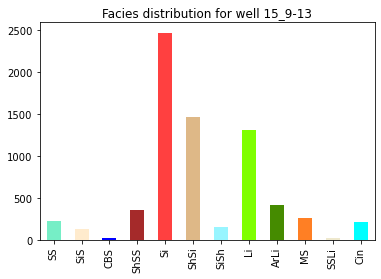

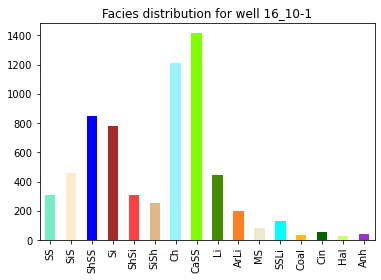

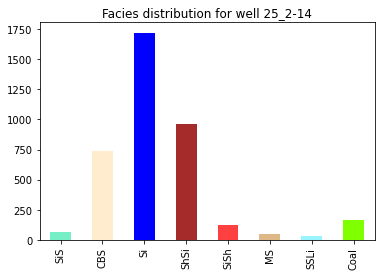

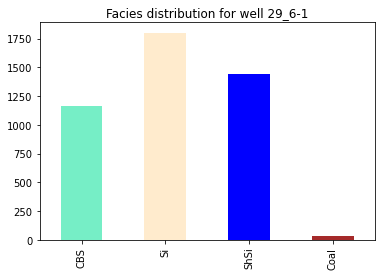

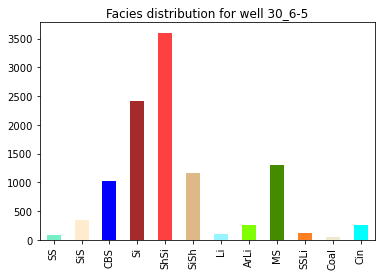

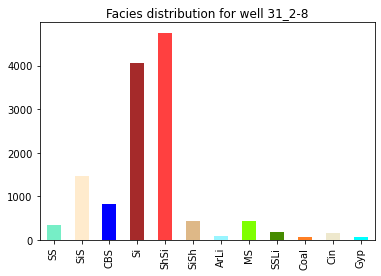

In [17]:
wells = list(train_and_test['well_names'].unique())
for well in wells:
    facies_distr_by_well(well)

In [18]:
def plotter(well_name, facies_colors):
    #make sure logs are sorted by depth
    logs = train_and_test[train_and_test['well_names'] == well_name].sort_values(by='depth')
    cmap_facies = mcolors.ListedColormap(facies_colors, 'indexed')
    
    max_depth=logs.depth.min(); min_depth=logs.depth.max()
    
    #cluster=np.repeat(np.expand_dims(logs['facies_ID'].values, 1), 100, 0)
    cluster=np.repeat(np.expand_dims(logs['facies_ID'].values,1), 100, 1)
   
    fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(8, 14))
    
    ax[0].plot(logs.GR, logs.depth, '-g')
    ax[1].plot(logs.RHOB, logs.depth, '-')
    ax[2].plot(logs.NPHI, logs.depth, '-', color='0.5')
    ax[3].plot(logs.DTC, logs.depth, '-', color='r')
    ax[4].plot(logs.RDEP, logs.depth, '-', color='blue')
    ax[5].plot(logs.SP, logs.depth, '-', color='black')
    
    im=ax[6].imshow(cluster, interpolation='none', aspect='auto', cmap=cmap_facies,vmin=1,vmax=len(facies_colors))
    #im = sns.heatmap(cluster, cmap=cmap_facies, annot = False)
    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="10%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((8*' ').join(facies_symbol))
    #cbar.set_label(facies_symbol)
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
 
    for i in range(len(ax)):
        ax[i].set_ylim(max_depth,min_depth)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("RHOB")
    ax[1].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[2].set_xlabel("NPHI")
    ax[2].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[3].set_xlabel("DTC")
    ax[3].set_xlim(logs.DTC.min(),logs.DTC.max())
    ax[4].set_xlabel("RDEP")
    ax[4].set_xlim(logs.RDEP.min(),logs.RDEP.max())  
    ax[5].set_xlabel("SP")
    ax[5].set_xlim(logs.SP.min(),logs.SP.max())   
    ax[6].set_xlabel('lithofacies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[6].set_xticklabels([])
    
    fig.suptitle('Well: %s'%logs.iloc[0]['well_names'], fontsize=14, y=0.94)

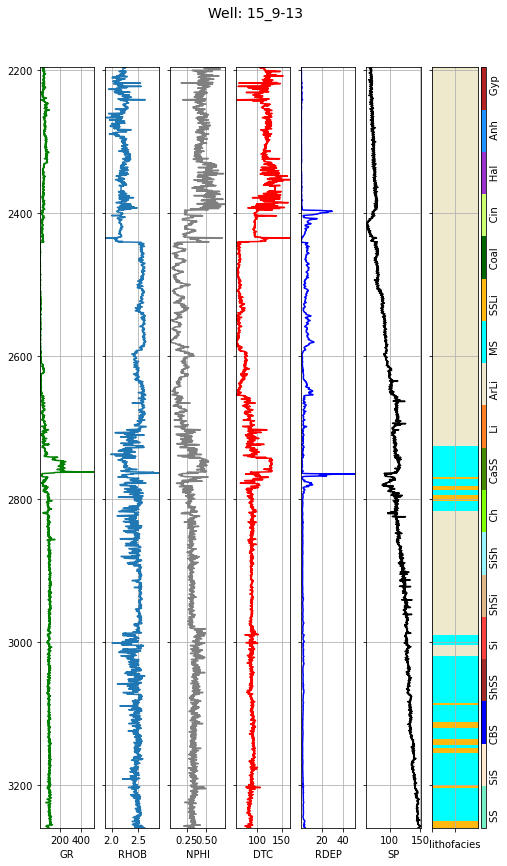

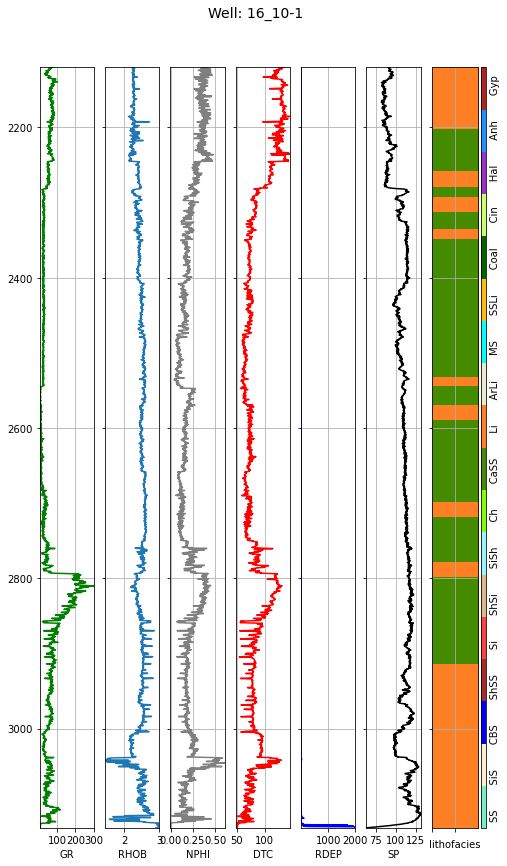

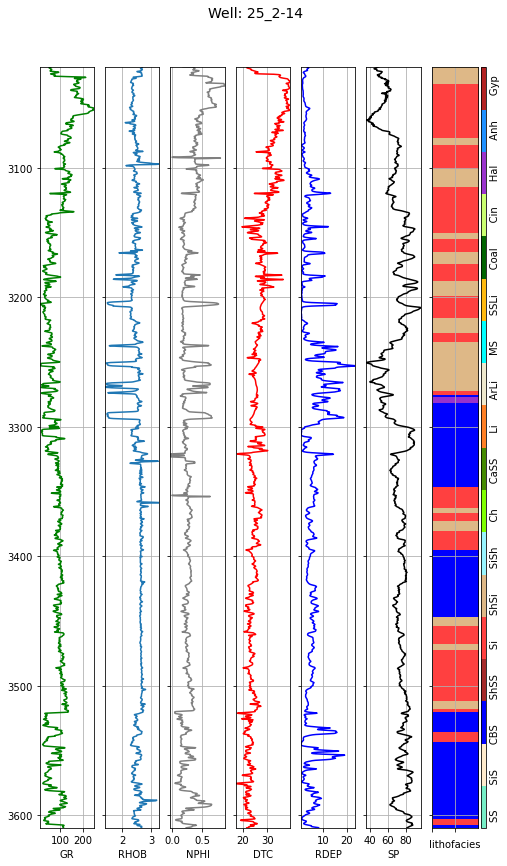

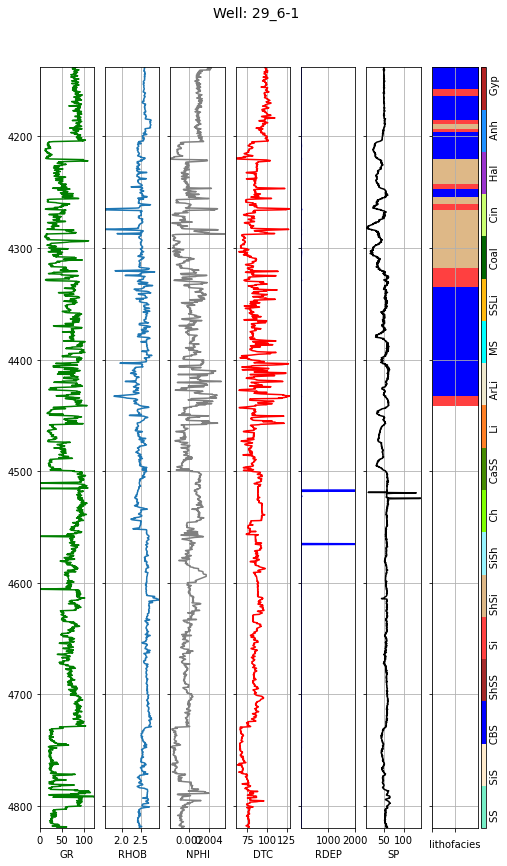

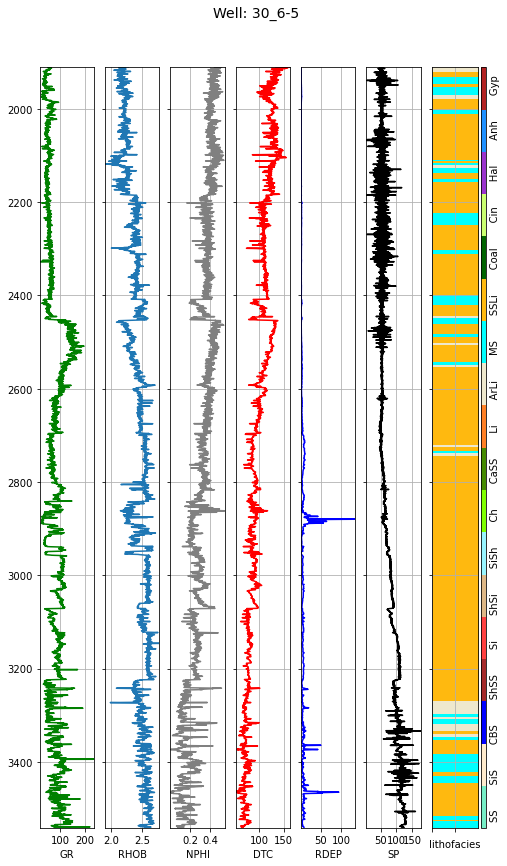

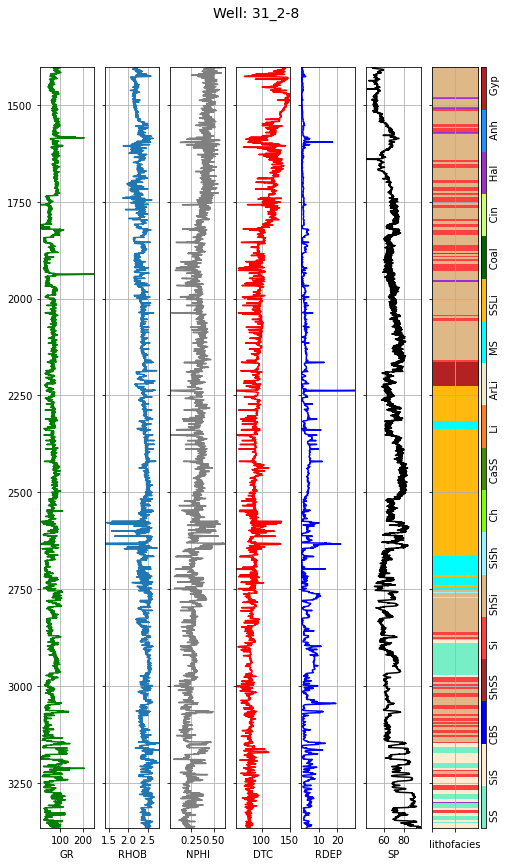

In [19]:
for name in list(train_and_test['well_names'].unique()):
    plotter(name, facies_colors)